In [1]:
import os

In [2]:
import pandas
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [12, 18]

In [4]:
import numpy
import pandas
import math

In [5]:
from preprocessing.read_data import read_article_amount_by_week, read_article_amount_by_month

In [6]:
dirPath = "Data\CSV\Edgar-format\combined"
filePathList_original = os.listdir(dirPath)
filePathList = os.listdir(dirPath)

In [7]:
# remove last one
del filePathList[-2]

In [8]:
filePathList

['CA.csv', 'CB.csv', 'CC.csv', 'CD.csv', 'CF.csv']

In [9]:
# by month
datasets = []
for i in range(len(filePathList)):
    datasets.append(read_article_amount_by_week(os.path.join(dirPath, filePathList[i])))

# Visualizing Data

In [10]:
import numpy
import pandas
import math

# Preprocessing Dataset

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\Python36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
# Model Building
no_epochs = 300
look_back = 12
unitsLSTM = 4
inputUnits = 1 # dataset.shape[1]
outputUnits = inputUnits

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(unitsLSTM, input_shape=(inputUnits, look_back)))
model.add(Dense(1)) # model.add(Dense(outputUnits))
model.compile(loss='mean_squared_error', optimizer='adam')

Trainset size:  121
Testset size:  60
Train Score: 122.96 RMSE
Test Score: 137.38 RMSE
Trainset size:  121
Testset size:  60
Train Score: 33.68 RMSE
Test Score: 57.34 RMSE
Trainset size:  121
Testset size:  60
Train Score: 30.29 RMSE
Test Score: 56.99 RMSE
Trainset size:  121
Testset size:  60
Train Score: 42.05 RMSE
Test Score: 62.19 RMSE
Trainset size:  121
Testset size:  60
Train Score: 57.57 RMSE
Test Score: 87.38 RMSE


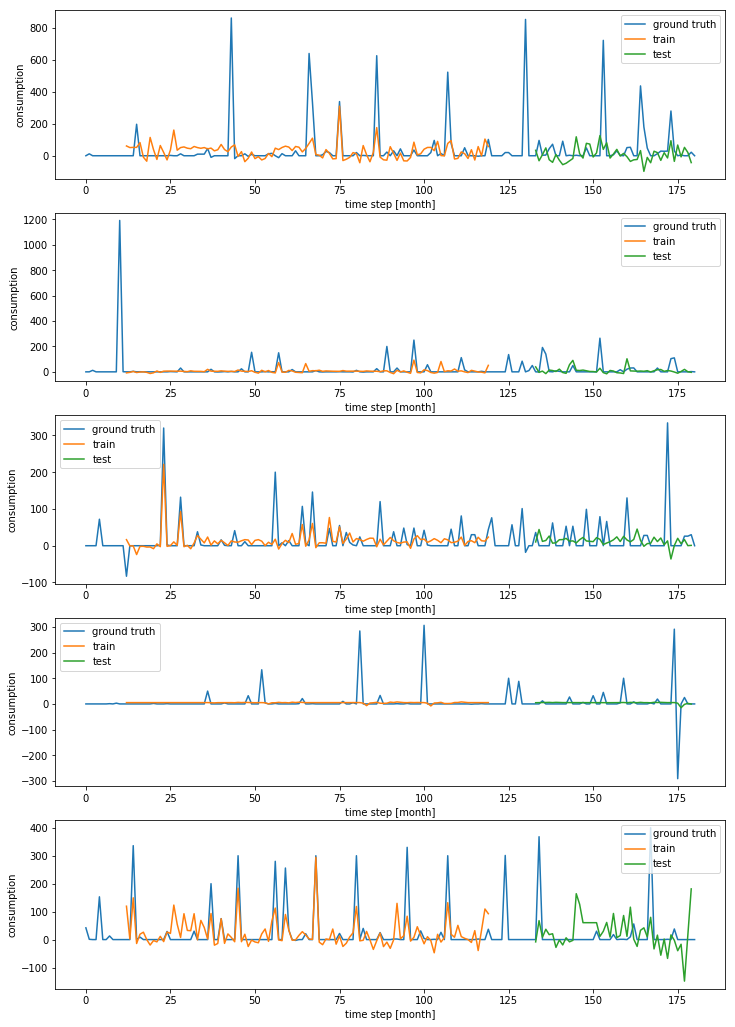

In [13]:
for i in range(len(datasets)):
    dataset = datasets[i]


    # fix random seed for reproducibility
    numpy.random.seed(7)

    dataset = dataset[:,1].reshape(-1,1)

    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # split into train and test sets
    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    print("Trainset size: ", len(train))
    print("Testset size: ", len(test))

    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)

    # reshape into X=t and Y=t+1
    
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



    # train without validation
    model.fit(trainX, trainY, epochs=no_epochs, batch_size=1, verbose=0)

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # invert predictions 
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    
    
    plt.subplot(len(datasets),1,i+1)
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    # plt.plot(scaler.inverse_transform(dataset))
    # plt.plot(trainPredictPlot)
    # plt.plot(testPredictPlot)
    # plt.show()

    plt.plot(scaler.inverse_transform(dataset), label='ground truth')
    plt.plot(trainPredictPlot, label='train')
    plt.plot(testPredictPlot, label='test')
    plt.xlabel('time step [month]')
    plt.ylabel('consumption')
    plt.legend()
    

# Inference Phase

In [14]:
inf_dataset_path = filePathList_original[-2]
dataset = read_article_amount_by_week(os.path.join(dirPath, inf_dataset_path))

In [15]:
inf_dataset_path

'CE.csv'

In [16]:
# fix random seed for reproducibility
numpy.random.seed(7)

dataset = dataset[:,1].reshape(-1,1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [17]:
testX, testY = create_dataset(dataset, look_back)

In [18]:
# reshape input to be [samples, time steps, features]
# trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
testPredict = model.predict(testX)

In [20]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 412.59 RMSE


In [22]:
testPredictPlot = testPredict

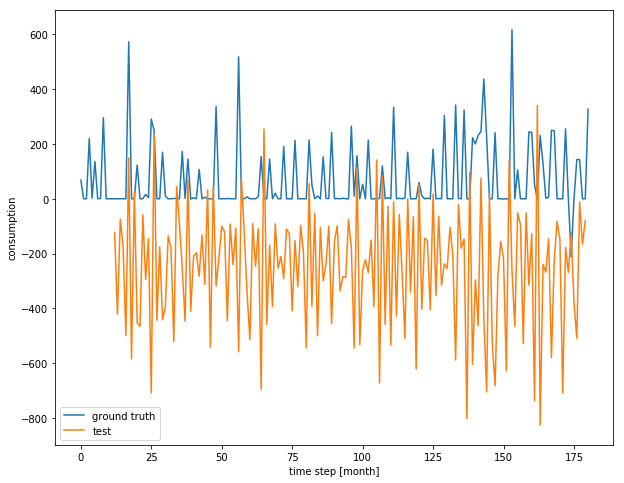

In [23]:
plt.figure(figsize=(10,8))

# shift train predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[look_back:len(testPredict)+look_back, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), label='ground truth')
plt.plot(testPredictPlot, label='test')
plt.xlabel('time step [month]')
plt.ylabel('consumption')
plt.legend()